# Quick Data Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv('datasets/trending_by_time.csv')

In [4]:
print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()
print(f"\nDescriptive statistics:")
display(df.describe(include='all').T)


Dataset shape: (12343, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12343 entries, 0 to 12342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   record_id       12343 non-null  int64 
 1   region          12343 non-null  object
 2   trending_date   12343 non-null  object
 3   category_title  12343 non-null  object
 4   videos_count    12343 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 482.3+ KB

Descriptive statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
record_id,12343.0,NaN,NaN,NaN,6172.0,3563.261521,1.0,3086.5,6172.0,9257.5,12343.0
region,12343,5,Russia,2930,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trending_date,12343,205,2018-02-28 00:00:00.000000,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_title,12343,18,People & Blogs,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
videos_count,12343.0,NaN,NaN,NaN,27.545167,29.793491,2.0,8.0,18.0,36.0,220.0


In [5]:
display(df.head())
display(df.tail())

,record_id,region,trending_date,category_title,videos_count
0,1,France,2017-11-14 00:00:00.000000,Autos & Vehicles,8
1,2,France,2017-11-15 00:00:00.000000,Autos & Vehicles,2
2,3,France,2017-11-16 00:00:00.000000,Autos & Vehicles,6
3,4,France,2017-11-17 00:00:00.000000,Autos & Vehicles,8
4,5,France,2017-11-18 00:00:00.000000,Autos & Vehicles,4


,record_id,region,trending_date,category_title,videos_count
12338,12339,United States,2018-06-10 00:00:00.000000,Travel & Events,2
12339,12340,United States,2018-06-11 00:00:00.000000,Travel & Events,2
12340,12341,United States,2018-06-12 00:00:00.000000,Travel & Events,2
12341,12342,United States,2018-06-13 00:00:00.000000,Travel & Events,2
12342,12343,United States,2018-06-14 00:00:00.000000,Travel & Events,2


In [6]:
print(df.dtypes)

record_id          int64
region            object
trending_date     object
category_title    object
videos_count       int64
dtype: object


In [7]:
# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)
display(missing_df)

,Missing Values,Percentage


In [8]:
# Summary of missing values
print("\nTotal number of missing values:", df.isnull().sum().sum())
print("Percentage of missing values in entire dataset:", 
      (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100, "%")


Total number of missing values: 0
Percentage of missing values in entire dataset: 0.0 %


In [9]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Text(0, 0.5, 'Average Number of Videos')

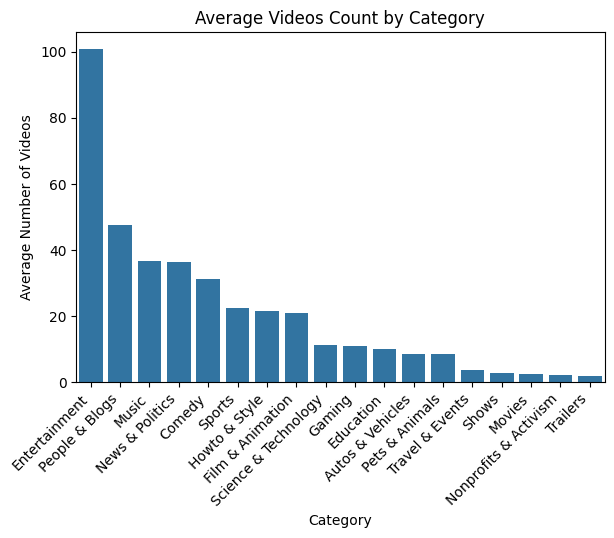

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
category_counts = df.groupby('category_title')['videos_count'].mean().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Average Videos Count by Category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Average Number of Videos')